In [273]:
import json
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [274]:
with open('C:\\Users\\39366\\Desktop\\Project SL\\playlists_from_200_search_words.json') as f:
  data = json.load(f)

In [275]:
with open('C:\\Users\\39366\\Desktop\\Project SL\\tracks.json') as f:
  data2 = json.load(f)

In [276]:
data3 = data[:100]

In [277]:
playlist = []
tracks = []
for i in range(len(data3)):
    for j in range(len(data3[i]['track_ids'])):
        tracks.append(data2[data3[i]['track_ids'][j]])
        playlist.append(data3[i]['id'])

In [278]:
db = pd.DataFrame.from_dict(tracks)
db['playlist'] = playlist

In [279]:
colVis = ['id','playlist','acousticness','danceability', 'energy', 'explicit', 'instrumentalness', 'key',
    'liveness', 'loudness', 'mode', 'speechiness', 'tempo','time_signature', 'valence', 'artists_popularities','artists_genres',
        'artists_names', 'duration_ms', 'album_name']

In [280]:
visualization = db[colVis]

In [281]:
visualization[:20]

,id,playlist,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artists_popularities,artists_genres,artists_names,duration_ms,album_name
0,1bWZPuueQsBbU5BEgYuynn,37i9dQZF1DX9sIqqvKsjG8,0.995,0.443,0.0316,False,0.930,0.0,0.1190,-25.607,1.0,0.0417,66.528,4.0,0.1730,[37],[],[Francesco de Galdeano],146192.0,Adela
1,3qp1ushu4Ve2Vl5keFaUDM,37i9dQZF1DX9sIqqvKsjG8,0.989,0.242,0.0544,False,0.915,8.0,0.1070,-26.277,1.0,0.0404,103.436,1.0,0.2630,[48],[],[Irma Kantola],147062.0,Morning Sun
2,0IBQM8tB107DZs0YCcXSt0,37i9dQZF1DX9sIqqvKsjG8,0.986,0.276,0.0507,False,0.867,2.0,0.1070,-25.719,0.0,0.0382,97.772,4.0,0.1450,[44],[],[Aurelius Conner],183129.0,Turning Ahead
3,2peMLXHmImghoblbAkNjIa,37i9dQZF1DX9sIqqvKsjG8,0.993,0.341,0.1060,False,0.914,7.0,0.1040,-19.423,1.0,0.0386,65.193,4.0,0.0397,[39],[],[Bill Prokopow],301852.0,Etude in Em
4,6VKid1zSeLVUEV3oQR2i0k,37i9dQZF1DX9sIqqvKsjG8,0.987,0.378,0.0603,False,0.894,0.0,0.1110,-24.635,1.0,0.0419,121.765,3.0,0.1350,[44],[background piano],[Pontiver Bogross],194085.0,Die Blaue Blume
5,3uz5pvPIZEkgRgOpaP20Ge,37i9dQZF1DX9sIqqvKsjG8,0.994,0.484,0.0292,False,0.950,5.0,0.1100,-23.059,0.0,0.0681,112.808,4.0,0.2360,[43],[],[Lucas Bernard],110039.0,Parce que tu me manques
6,1BZo2CHWy9gSgidvexgNYM,37i9dQZF1DX9sIqqvKsjG8,0.995,0.291,0.0121,False,0.827,10.0,0.1120,-28.978,1.0,0.0554,180.095,4.0,0.1060,[42],[background piano],[Johann Kurzweil],218097.0,Der Regenbogen
7,1PYVWMwBocquvlCpYzwwxA,37i9dQZF1DX9sIqqvKsjG8,0.995,0.361,0.1370,False,0.949,3.0,0.0988,-25.830,0.0,0.0518,88.766,4.0,0.2490,[38],[],[Akane],190635.0,Color Me Blue
8,7nC2EOpMnpDT2DkvniimSm,37i9dQZF1DX9sIqqvKsjG8,0.972,0.389,0.1000,False,0.934,10.0,0.1130,-22.464,0.0,0.0358,133.839,4.0,0.0676,[58],[neo-classical],[Annelie],161520.0,Lost
9,7BbUNLqsUWQAM0QUNoFZWs,37i9dQZF1DX9sIqqvKsjG8,0.993,0.390,0.0434,False,0.938,2.0,0.1080,-22.244,1.0,0.0543,163.797,3.0,0.2550,[59],"[background music, background piano, calming i...",[S.A. Karl],134000.0,Aldebaran


In [282]:
df = db[['playlist', 'id', 'name','acousticness','danceability', 'energy', 'explicit', 'instrumentalness', 'key',
    'liveness', 'loudness', 'mode', 'speechiness', 'tempo','time_signature', 'valence', 'artists_popularities','artists_genres',
        'artists_names', 'duration_ms', 'album_name']]

In [283]:
df.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_ms
count,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7.819000e+03
mean,0.553795,0.586543,0.386545,0.673871,5.191712,0.145733,-13.701994,0.624888,0.082669,114.525247,3.879652,0.370776,1.887444e+05
std,0.384670,0.184057,0.269621,0.345867,3.575513,0.109415,7.141113,0.484183,0.087546,31.415329,0.476320,0.240815,7.995326e+04
min,0.000001,0.000000,0.000127,0.000000,0.000000,0.018800,-47.001000,0.000000,0.000000,0.000000,0.000000,0.000000,2.606200e+04
25%,0.128000,0.467000,0.161000,0.509500,2.000000,0.097300,-17.691500,0.000000,0.038800,87.038500,4.000000,0.167000,1.372695e+05
50%,0.657000,0.618000,0.338000,0.859000,5.000000,0.111000,-12.301000,1.000000,0.049600,114.044000,4.000000,0.331000,1.775350e+05
75%,0.938000,0.725000,0.589000,0.915000,8.000000,0.140000,-8.352500,1.000000,0.079300,134.922000,4.000000,0.542000,2.242070e+05
max,0.996000,0.976000,0.998000,0.997000,11.000000,0.981000,1.329000,1.000000,0.882000,240.118000,5.000000,0.984000,2.266082e+06


In [284]:
train, test = train_test_split(df, test_size=0.2, random_state=48, stratify = df['playlist'])
train, val = train_test_split(train, test_size=0.2, random_state=48, stratify = train['playlist'])

In [285]:
train.reset_index(inplace = True)

In [286]:
scaleCols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
             'key', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'time_signature', 'artists_popularities','duration_ms']

In [287]:
features = train[scaleCols]

In [288]:
artists_popularity = []
for i in range(len(train['artists_popularities'])):
    artists_popularity += [np.mean(train['artists_popularities'][i])]

In [289]:
artists_names = []
for i in range(len(train['artists_names'])):
     artists_names += [(train['artists_names'][i][0])]

In [290]:
artists_genres = []
for i in range(len(train['artists_genres'])):
    if len(train['artists_genres'][i]) > 0:
        artists_genres += [(train['artists_genres'][i][0])]
    else:
        artists_genres += [0]

In [291]:
train['artists_popularities'] = artists_popularity
train['artists_names'] = artists_names
train['artists_genres'] = artists_genres

In [292]:
scaler = StandardScaler()
scaler.fit(train.loc[:, scaleCols])
train_scaled = train
train_scaled[scaleCols] = scaler.transform(train_scaled[scaleCols]) #scale transform cluster columns
train_scaled['index'] = np.arange(1, len(train_scaled)+1) #reappend index column
train_scaled = train_scaled.rename(columns = {'acousticness': 'acousticness_scaled',
                                              'danceability': 'danceability_scaled',
                                              'energy': 'energy_scaled',
                                              'instrumentalness': 'instrumentalness_scaled',
                                              'key': 'key_scaled',
                                              'liveness': 'liveness_scaled',
                                              'loudness': 'loudness_scaled',
                                              'speechiness': 'speechiness_scaled',
                                              'tempo': 'tempo_scaled',
                                              'valence': 'valence_scaled',
                                              'time_signature': 'time_signature_scaled',
                                              'artists_popularities': 'artists_popularities_scaled',
                                              'duration_ms':'duration_ms_scaled'})

In [293]:
joinCols = ['index', 'playlist', 'id', 
            'name', 'album_name','explicit', 'mode']
train_new = train.merge(train_scaled, on = joinCols, how = 'outer') #merge scaled data with original data

In [294]:
clusterCols = ['acousticness_scaled','danceability_scaled', 
               'energy_scaled', 'instrumentalness_scaled',
               'key_scaled', 'liveness_scaled', 'loudness_scaled',
               'speechiness_scaled', 'tempo_scaled', 'time_signature_scaled',
               'valence_scaled'] #variables to cluster
train_new[clusterCols].corr()

,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,key_scaled,liveness_scaled,loudness_scaled,speechiness_scaled,tempo_scaled,time_signature_scaled,valence_scaled
acousticness_scaled,1.000000,-0.383708,-0.757153,0.460782,-0.053559,-0.221307,-0.608065,-0.135964,-0.184472,-0.162812,-0.311328
danceability_scaled,-0.383708,1.000000,0.339543,-0.182581,0.052579,0.032801,0.434541,0.252395,0.034214,0.218409,0.467985
energy_scaled,-0.757153,0.339543,1.000000,-0.494341,0.033328,0.258054,0.797407,0.092834,0.195383,0.166573,0.345035
instrumentalness_scaled,0.460782,-0.182581,-0.494341,1.000000,-0.015073,-0.203627,-0.463545,-0.200545,-0.105718,-0.084264,-0.212143
key_scaled,-0.053559,0.052579,0.033328,-0.015073,1.000000,-0.005712,0.035902,0.051810,0.007400,0.014886,0.028086
liveness_scaled,-0.221307,0.032801,0.258054,-0.203627,-0.005712,1.000000,0.216835,0.110181,0.032251,0.040056,0.099113
loudness_scaled,-0.608065,0.434541,0.797407,-0.463545,0.035902,0.216835,1.000000,0.152087,0.135353,0.145847,0.333064
speechiness_scaled,-0.135964,0.252395,0.092834,-0.200545,0.051810,0.110181,0.152087,1.000000,0.082322,0.025273,0.204942
tempo_scaled,-0.184472,0.034214,0.195383,-0.105718,0.007400,0.032251,0.135353,0.082322,1.000000,0.017857,0.088072
time_signature_scaled,-0.162812,0.218409,0.166573,-0.084264,0.014886,0.040056,0.145847,0.025273,0.017857,1.000000,0.120633


In [295]:
train_new.dropna(inplace=True)

In [296]:
clusterCols = ['acousticness_scaled','danceability_scaled', 
               'energy_scaled', 'instrumentalness_scaled',
               'key_scaled', 'liveness_scaled', 'loudness_scaled',
               'speechiness_scaled', 'tempo_scaled', 'time_signature_scaled',
               'valence_scaled'] #variables to cluster

In [297]:
X = train_new

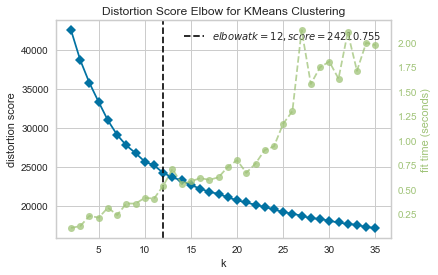

In [298]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
model = KElbowVisualizer(KMeans(), k=35)
model.fit(train_new.loc[:, clusterCols])
model.show()

In [299]:
from collections import defaultdict
from scipy.spatial.distance import euclidean

In [300]:
def assign_cluster_label(dataframe,clusterCols,n):
    X = dataframe[clusterCols]
    kmeans = KMeans(n_clusters = 11, random_state=0).fit(X)
    dataframe['cluster_label'] = kmeans.labels_
    dataframe_centroids = kmeans.cluster_centers_
    
    dfCentroid = pd.DataFrame.from_records(dataframe_centroids)
    rankC = defaultdict(list)

    for i in range(n):
        rankC['cluster'].append(i)
        for j in range(n):
            rankC[j].append(euclidean(dfCentroid[i], dfCentroid[j]))    
    rankC = pd.DataFrame(rankC)
    orderRankC = defaultdict(list)
    for i in range(n):
        orderRankC[i] = rankC[i].sort_values(ascending = True).index.values
    
    return dataframe, dataframe_centroids,orderRankC,X

In [301]:
info_cluster = assign_cluster_label(train_new,clusterCols,11)

In [302]:
train_cluster = info_cluster[0]

In [315]:
colsVisCluster = ['playlist','id','cluster_label','acousticness_scaled','danceability_scaled', 
               'energy_scaled', 'instrumentalness_scaled',
               'key_scaled', 'liveness_scaled', 'loudness_scaled',
               'speechiness_scaled', 'tempo_scaled', 'time_signature_scaled',
               'valence_scaled']

In [316]:
clusterized = train_cluster[colsVisCluster]

In [318]:
clusterized[:20]

,playlist,id,cluster_label,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,key_scaled,liveness_scaled,loudness_scaled,speechiness_scaled,tempo_scaled,time_signature_scaled,valence_scaled
0,54AOa7ClyM1pxgi3Wypu4G,2lOFt38PO9BqPWVJLXTBbC,2,0.530466,0.755525,0.033153,0.571369,-1.169885,-0.590876,0.268650,-0.636829,-0.206556,0.251255,-0.560364
1,3po6Vxpx1CY1A4NkO7NTRz,3qS1P8A7CDtkbJdLTx0GZf,0,0.997682,0.076022,-0.070511,0.577184,-0.333791,-0.053154,-0.141503,-0.261476,1.652875,0.251255,2.450637
2,74sUjcvpGfdOvCHvgzNEDO,6utQSu0CAvFb8wnEckHVbt,10,-1.232754,0.119861,0.007237,-0.286317,1.059698,-0.258596,0.674886,2.679553,1.715078,0.251255,-1.306262
3,1YJe9dmtfOWC2lKbIdJUWm,1tBOzT3RQZWDS5zkBrMq4r,8,1.015852,-1.200785,-0.877610,-0.318298,0.502302,-0.115680,-0.248658,-0.588766,0.793343,2.332433,-0.838623
4,37i9dQZF1DX3qCx5yEZkcJ,03qYV8hat9j4ttaPN2HKfh,3,-1.058067,1.111715,0.603306,-1.620818,1.059698,-0.458679,0.435257,1.249091,-0.839368,0.251255,1.296074
5,4DvDLiZxLeUHWMErYhncB5,3NciuZi7hSVWotPjMxWu55,9,-0.009427,0.443173,0.658840,0.705110,0.502302,-0.240731,0.847368,-0.398801,-1.094460,0.251255,-1.091962
6,148My4xA7WoEaNDmnl2A8Z,16fPrLFNDUXHBnarWpmVXt,6,-1.332167,0.837722,1.043878,0.728370,1.617094,-0.338986,0.460437,0.076113,-0.587005,0.251255,0.004458
7,4s6BkxYZKg0OeIJClhpsO5,2bJdcsMjjBDamfjx7Wrr9R,2,0.797818,0.371934,-0.385206,0.478332,-1.448582,-0.330054,0.036855,-0.378202,-0.532832,0.251255,1.134103
8,37i9dQZF1DXdlhitnpe6FT,3bkNIeAr9FJXzCHUaF0ISU,1,-0.388391,-2.258398,-0.455549,0.850481,-0.055093,-0.017425,0.019508,-0.554435,-0.454127,0.251255,-1.235244
9,1dQQkNsgAcfAzO1KTvHOTR,0Y97dC6xd7woak0IJMQyVs,0,-1.406455,0.750045,0.840252,0.620795,1.338396,1.259888,0.825546,-0.032602,2.128151,0.251255,1.404055


In [303]:
orderRanckC = pd.DataFrame(info_cluster[2]).T

In [304]:
X = info_cluster[3]

In [305]:
orderRanckC

,0,1,2,3,4,5,6,7,8,9,10
0,0,3,4,8,10,7,1,6,2,5,9
1,1,6,10,2,4,8,7,3,5,0,9
2,2,6,1,10,8,4,5,7,3,0,9
3,3,0,4,8,10,1,6,2,7,5,9
4,4,8,10,1,6,3,2,0,7,5,9
5,5,2,6,10,8,4,1,7,3,0,9
6,6,2,1,10,8,4,7,5,3,0,9
7,7,10,1,4,8,6,2,3,0,5,9
8,8,4,6,2,10,1,3,7,0,5,9
9,9,1,2,10,6,8,4,7,3,5,0


In [306]:
X

,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,key_scaled,liveness_scaled,loudness_scaled,speechiness_scaled,tempo_scaled,time_signature_scaled,valence_scaled
0,0.530466,0.755525,0.033153,0.571369,-1.169885,-0.590876,0.268650,-0.636829,-0.206556,0.251255,-0.560364
1,0.997682,0.076022,-0.070511,0.577184,-0.333791,-0.053154,-0.141503,-0.261476,1.652875,0.251255,2.450637
2,-1.232754,0.119861,0.007237,-0.286317,1.059698,-0.258596,0.674886,2.679553,1.715078,0.251255,-1.306262
3,1.015852,-1.200785,-0.877610,-0.318298,0.502302,-0.115680,-0.248658,-0.588766,0.793343,2.332433,-0.838623
4,-1.058067,1.111715,0.603306,-1.620818,1.059698,-0.458679,0.435257,1.249091,-0.839368,0.251255,1.296074
...,...,...,...,...,...,...,...,...,...,...,...
4999,0.862709,0.333575,2.036091,0.126536,0.223604,-0.258596,1.226466,-0.583044,-0.124297,0.251255,1.632475
5000,-1.146319,0.821283,1.743611,-1.958072,0.781000,-0.799891,1.543174,-0.269487,-0.650445,0.251255,1.175634
5001,1.101508,-0.291129,-0.736923,0.655684,-1.448582,2.135250,-0.285309,0.028049,-1.154885,0.251255,-0.174126
5002,-1.309066,1.166514,0.906893,-1.958077,1.059698,-0.133544,0.682020,1.054549,0.495535,0.251255,1.707231


In [307]:
kmeans = KMeans(n_clusters=11).fit(X)

In [308]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledX = pd.concat((X,labels),axis=1)
labeledX = labeledX.rename({0:'labels'},axis=1)

In [309]:
labeledX.head()

,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,key_scaled,liveness_scaled,loudness_scaled,speechiness_scaled,tempo_scaled,time_signature_scaled,valence_scaled,labels
0,0.530466,0.755525,0.033153,0.571369,-1.169885,-0.590876,0.268650,-0.636829,-0.206556,0.251255,-0.560364,0.0
1,0.997682,0.076022,-0.070511,0.577184,-0.333791,-0.053154,-0.141503,-0.261476,1.652875,0.251255,2.450637,9.0
2,-1.232754,0.119861,0.007237,-0.286317,1.059698,-0.258596,0.674886,2.679553,1.715078,0.251255,-1.306262,1.0
3,1.015852,-1.200785,-0.877610,-0.318298,0.502302,-0.115680,-0.248658,-0.588766,0.793343,2.332433,-0.838623,10.0
4,-1.058067,1.111715,0.603306,-1.620818,1.059698,-0.458679,0.435257,1.249091,-0.839368,0.251255,1.296074,6.0


In [310]:
from sklearn.decomposition import PCA

In [311]:
pca = PCA(n_components=2).fit(X)

In [312]:
pca_2d = pca.transform(X)

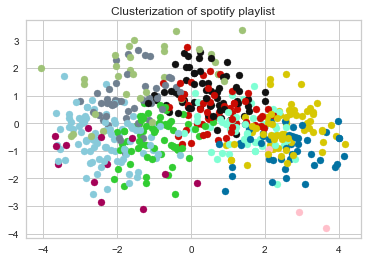

In [313]:
import pylab as pl
for i in range(0, pca_2.shape[0]):
    if labeledX.labels[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r')
    elif labeledX.labels[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g')
    elif labeledX.labels[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b')
    elif labeledX.labels[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m')
    elif labeledX.labels[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='k')
    elif labeledX.labels[i] == 5:
        c6 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y')
    elif labeledX.labels[i] == 6:
        c7 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='c')
    elif labeledX.labels[i] == 7:
        c8 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='limegreen')
    elif labeledX.labels[i] == 8:
        c9 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='pink')
    elif labeledX.labels[i] == 9:
        c10 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='slategray')
    elif labeledX.labels[i] == 10:
        c11 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='aquamarine')
        

pl.title('Clusterization of spotify playlist')
pl.show()